In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [4]:
train_transaction = pd.read_csv('./train_transaction.csv', index_col='TransactionID')
test_transaction = pd.read_csv('./test_transaction.csv', index_col='TransactionID')

train_identity = pd.read_csv('./train_identity.csv', index_col='TransactionID')
test_identity = pd.read_csv('./test_identity.csv', index_col='TransactionID')

In [5]:
# merge
train = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)
test = test_transaction.merge(test_identity, how='left', left_index=True, right_index=True)

(0, 1000)

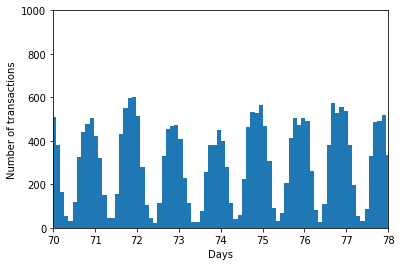

In [6]:
# there is definitely a periodicity to the number of transactions
vals = plt.hist(train['TransactionDT'] / (3600*24), bins=1800)
plt.xlim(70, 78)
plt.xlabel('Days')
plt.ylabel('Number of transactions')
plt.ylim(0,1000)

In [8]:
def make_day_feature(df, offset=0, tname='TransactionDT'):
    """
    Creates a day of the week feature, encoded as 0-6. 
    
    Parameters:
    -----------
    df : pd.DataFrame
        df to manipulate.
    offset : float (default=0)
        offset (in days) to shift the start/end of a day.
    tname : str
        Name of the time column in df.
    """
    # found a good offset is 0.58
    days = df[tname] / (3600*24)        
    encoded_days = np.floor(days-1+offset) % 7
    return encoded_days

def make_hour_feature(df, tname='TransactionDT'):
    """
    Creates an hour of the day feature, encoded as 0-23. 
    
    Parameters:
    -----------
    df : pd.DataFrame
        df to manipulate.
    tname : str
        Name of the time column in df.
    """
    hours = df[tname] / (3600)        
    encoded_hours = np.floor(hours) % 24
    return encoded_hours

### Part I: Observe if there is day correlation 

Text(0, 0.5, 'Fraction of fraudulent transactions')

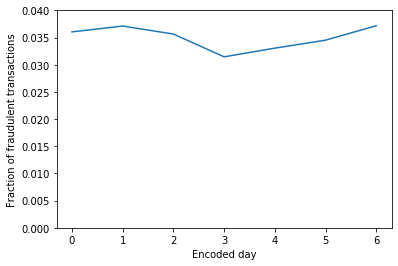

In [10]:
# use our 'make_day_feature' function to create our new feature

train['weekday'] = make_day_feature(train, offset=0)
plt.plot(train.groupby('weekday').mean()['isFraud'])

plt.ylim(0, 0.04)
plt.xlabel('Encoded day')
plt.ylabel('Fraction of fraudulent transactions')

#### As we can see, there is not a significant correlation on the day of the week and whether a transaction is fraudulent. This feature is unlikely to be useful :( 

### Part II: Observe if there is hour correlation 

Text(0, 0.5, 'Number of transactions')

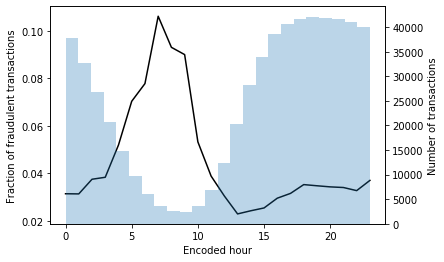

In [11]:
# create a feature which encodes the (relative) hour of the day

train['hours'] = make_hour_feature(train)
plt.plot(train.groupby('hours').mean()['isFraud'], color='k')
ax = plt.gca()
ax2 = ax.twinx()
_ = ax2.hist(train['hours'], alpha=0.3, bins=24)
ax.set_xlabel('Encoded hour')
ax.set_ylabel('Fraction of fraudulent transactions')

ax2.set_ylabel('Number of transactions')

#### Wow! Clearly the time of day has a strong dependence on whether the transaction is fraudulent and will likely make a good feature for our machine learning models. :) 

Physically, the higher fraction of fraudulent transactions coincides with when there are a low number of transactions. 

This likely reflects international fraud: e.g., card details being used by a third-party in a fraudulent way in a country different to where the card was issued.

Going forward, this is a feature we can use in our models and it will likely be a good predictor of the target.

### Conclusion 

The day of the week does not seem like a very powerful feature. 

However, the **hour of the day** is very likely to be a useful feature to include in models.